<a href="https://colab.research.google.com/github/vaseem-20/Artificial-Intelligence/blob/main/ANN_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Data exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

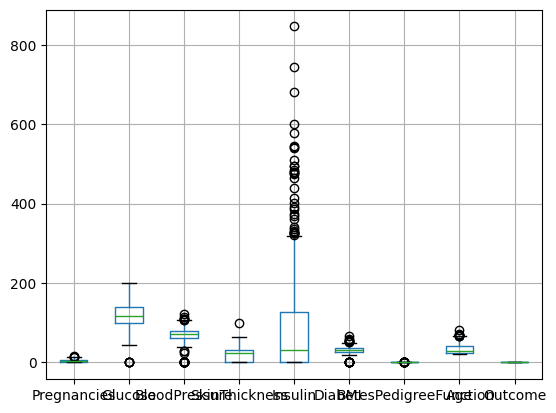

In [8]:
df.boxplot()

In [9]:
from matplotlib import pyplot as plt

<Axes: >

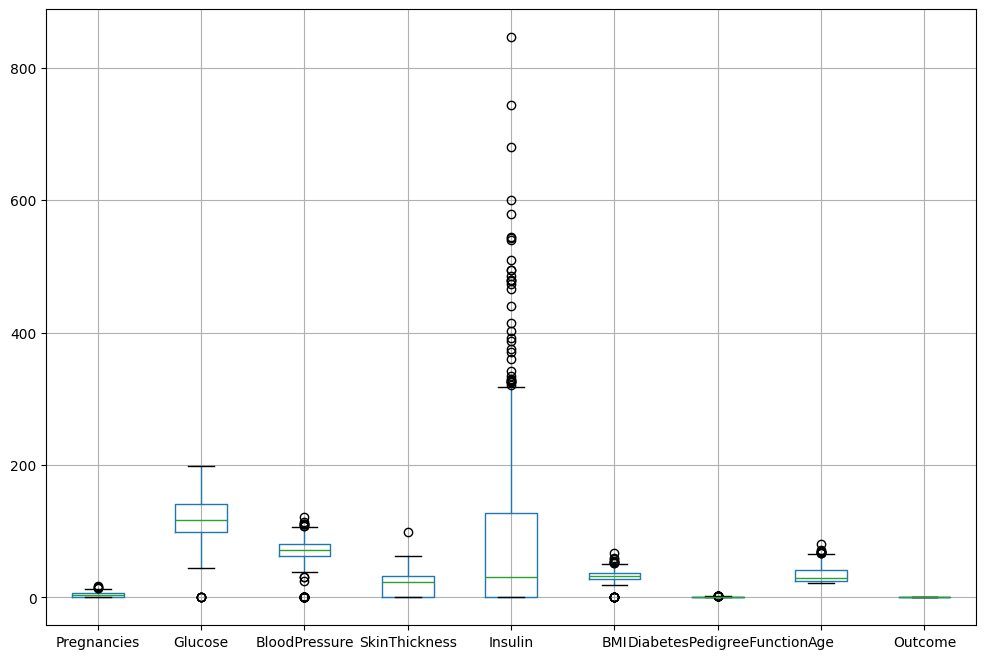

In [10]:
plt.figure(figsize=(12,8))
df.boxplot()

In [ ]:
# Handling the outliers
#q1 = df.quantile(0.25)
#q3 = df.quantile(0.75)
#iqr = q3 - q1
#lower_bond = q1 - 1.5 * iqr
#upper_bond = q3 + 1.5 * iqr

In [ ]:
# splitting the data

In [11]:
x=df.drop(columns=['Outcome'],axis=1)
x


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [12]:
y=df['Outcome']
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [13]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [17]:
x_train.shape,y_train.shape

((614, 8), (614,))

In [ ]:
# Scaling is required in case of this ann model in order to avoid domination of bigger value

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()

In [20]:
scaler.fit_transform(x_train)

array([[-0.52639686, -1.15139792, -3.75268255, ..., -4.13525578,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.27664283,  0.68034485, ..., -0.48916881,
         2.41502991,  1.48710085],
       [-0.82846011,  0.56687102, -1.2658623 , ..., -0.42452187,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.62029661,  0.89659009, ...,  1.76054443,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.62935353, -3.75268255, ...,  1.34680407,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.12949347,  1.43720319, ..., -1.22614383,
        -0.61552223, -1.03594038]])

In [24]:
x_train_values=pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)

In [25]:
x_train_values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.526397,-1.151398,-3.752683,-1.322774,-0.701206,-4.135256,-0.490735,-1.035940
1,1.588046,-0.276643,0.680345,0.233505,-0.701206,-0.489169,2.415030,1.487101
2,-0.828460,0.566871,-1.265862,-0.090720,0.013448,-0.424522,0.549161,-0.948939
3,-1.130523,1.254179,-1.049617,-1.322774,-0.701206,-1.303720,-0.639291,2.792122
4,0.681856,0.410665,0.572222,1.076490,2.484601,1.838121,-0.686829,1.139095
...,...,...,...,...,...,...,...,...
609,0.379793,0.566871,-0.292759,0.946800,0.504235,-0.437451,-0.172824,-0.600933
610,-0.828460,-0.776503,2.842797,-1.322774,-0.701206,-1.239073,-0.778934,-0.513932
611,1.890109,-0.620297,0.896590,1.076490,-0.701206,1.760544,1.981245,0.443084
612,-1.130523,0.629354,-3.752683,-1.322774,-0.701206,1.346804,-0.784877,-0.339929


In [26]:
x_test_values=pd.DataFrame(scaler.fit_transform(x_test),columns=x_test.columns)

In [27]:
x_test_values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.491242,-0.726678,-0.441476,0.667308,1.051919,0.233748,-0.170941,0.666612
1,-0.633683,-0.285349,0.318908,0.611305,-0.660221,0.435379,-1.086080,-1.073358
2,-0.633683,-0.411443,-0.173105,-1.180790,-0.660221,-0.145794,-1.053629,-1.073358
3,1.053704,-0.442966,0.542551,-1.180790,-0.660221,-0.881156,1.211504,-0.045194
4,0.772473,0.471215,0.989836,-1.180790,-0.660221,-0.252540,-0.884879,1.220238
...,...,...,...,...,...,...,...,...
149,1.334935,1.385396,0.900379,-1.180790,-0.660221,-0.193237,-0.586323,1.141149
150,-0.914915,-1.388671,-0.530933,0.499299,-0.155591,0.150723,2.493349,-0.836089
151,1.053704,-0.821248,0.184723,-1.180790,-0.660221,0.565847,0.007544,1.773865
152,-0.633683,0.786450,0.095266,0.947323,2.583834,-0.477893,-0.472742,-0.440642


In [29]:
x_train_values.shape

(614, 8)

In [30]:
x_test_values.shape

(154, 8)

In [31]:
import tensorflow as tf

In [ ]:
# create instance of model

In [32]:
model= tf.keras.Sequential(name='main_container') #architecture

In [ ]:
# adding input layer to architecture

In [33]:
model.add(tf.keras.layers.Input(shape=[8],name='input_layer'))

In [ ]:
# adding hidden layers(dence layer)

In [35]:
model.add(tf.keras.layers.Dense(units=9,activation='relu',name='hidden_layer_1'))
model.add(tf.keras.layers.Dense(units=7,activation='relu',name='hidden_layer_2'))
model.add(tf.keras.layers.Dense(units=5,activation='relu',name='hidden_layer_3'))


In [ ]:
# adding the output layer

In [36]:
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid',name='output_layer'))

In [37]:
model.summary()

Model: "main_container"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 9)              │            81 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 7)              │            70 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 5)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197 (788.00 B)

 Trainable params: 197 (788.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
from tensorflow.keras.utils import plot_model

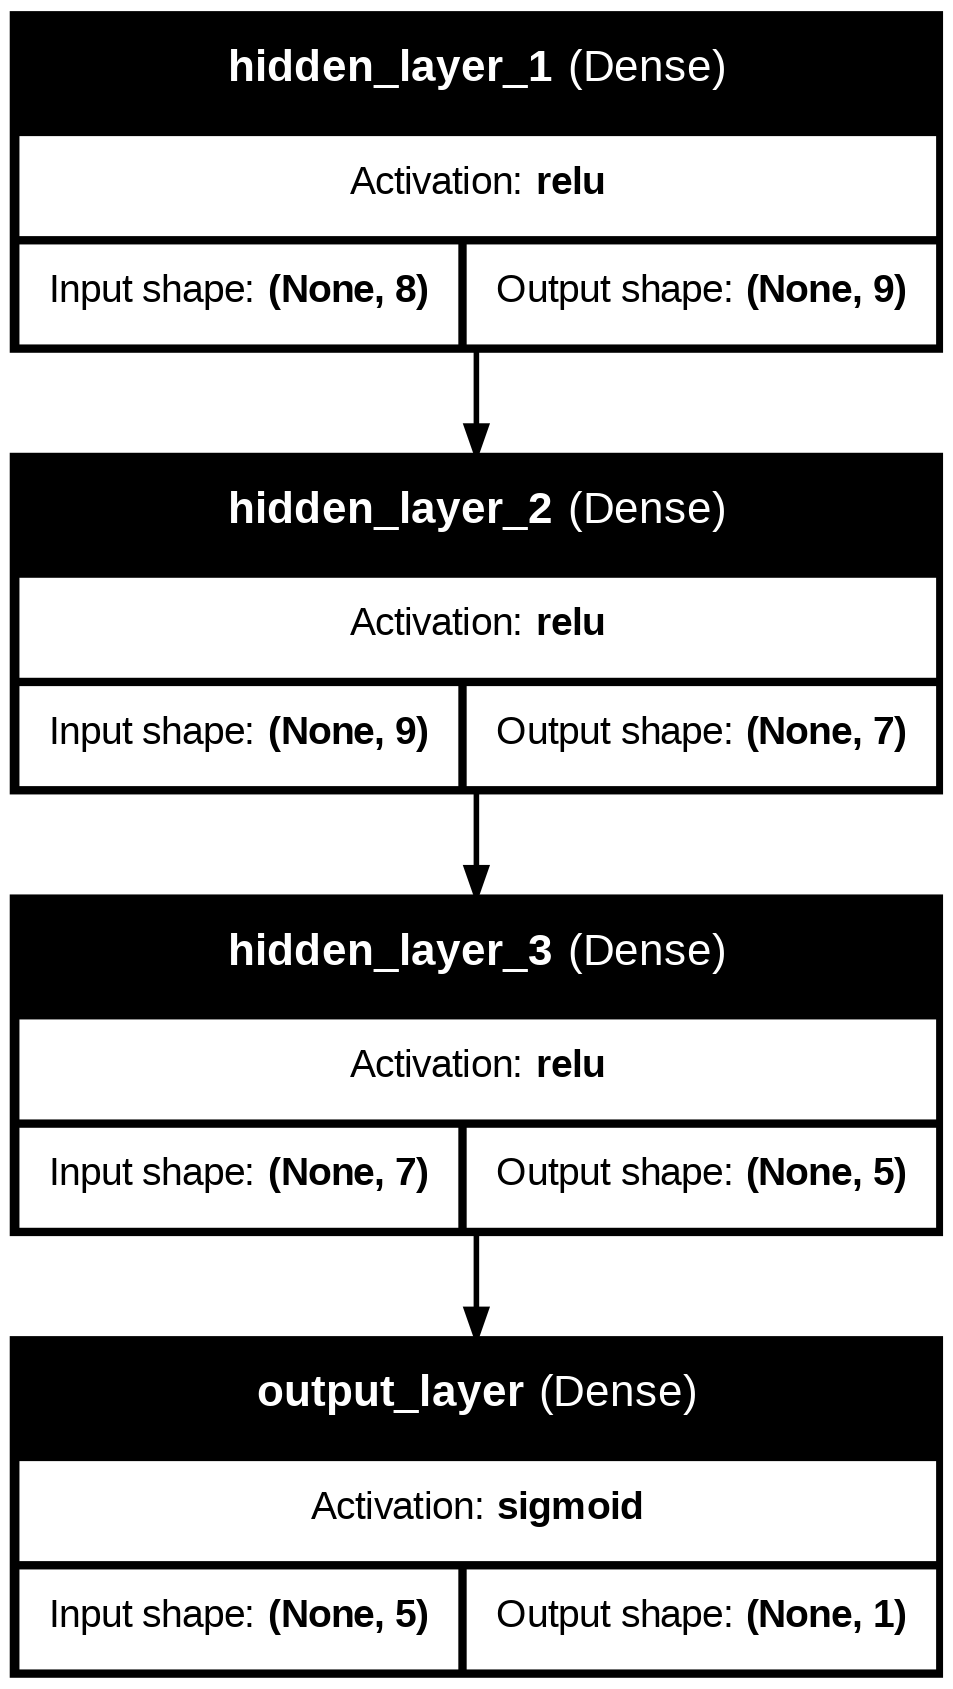

In [41]:
plot_model(model,show_shapes=True,show_layer_names=True,show_layer_activations=True)

In [ ]:
# once the architecture has been created, can add the functionality to model

In [42]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']

)

In [45]:
model.fit(x_train_values,y_train,batch_size=10,validation_split=0.2,epochs=10)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6663 - loss: 0.7605 - val_accuracy: 0.6098 - val_loss: 0.7504
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6882 - loss: 0.6323 - val_accuracy: 0.6098 - val_loss: 0.6809
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6726 - loss: 0.6105 - val_accuracy: 0.6098 - val_loss: 0.6397
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6949 - loss: 0.5656 - val_accuracy: 0.6098 - val_loss: 0.6122
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6602 - loss: 0.5424 - val_accuracy: 0.6179 - val_loss: 0.5837
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6998 - loss: 0.5177 - val_accuracy: 0.6260 - val_loss: 0.5633
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6701 - loss: 0.5311 - val_accuracy: 0.6423 - val_loss: 0.5462
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7166 - loss: 0.4867 - val_accuracy: 0.6504 - val_loss:

In [46]:
model.fit(x_train_values,y_train,batch_size=10,validation_split=0.2,epochs=100)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7909 - loss: 0.4896 - val_accuracy: 0.7236 - val_loss: 0.5135
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7924 - loss: 0.4879 - val_accuracy: 0.7317 - val_loss: 0.5123
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7756 - loss: 0.4957 - val_accuracy: 0.7317 - val_loss: 0.5067
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7945 - loss: 0.4515 - val_accuracy: 0.7236 - val_loss: 0.5035
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8050 - loss: 0.4525 - val_accuracy: 0.7236 - val_loss: 0.4972
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8275 - loss: 0.4314 - val_accuracy: 0.7154 - val_loss: 0.4985
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8098 - loss: 0.4361 - val_accuracy: 0.7236 - val_loss: 0.4932
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7874 - loss: 0.4693 - val_accuracy: 0.7236 - v

In [47]:
y_logs=model.predict(x_test_values)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [49]:
y_pred=np.where(y_logs>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    